In [1]:
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')

from pprint import pprint

In [2]:
# apply the function to a meshgrid and add noise
xx, yy = np.mgrid[0:0.5 * np.pi:500j, 0:0.8 * np.pi:500j]

np.random.seed(42)


In [6]:
# generate a regular field
_field = np.sin(xx)**2 + np.cos(yy)**2 + 10


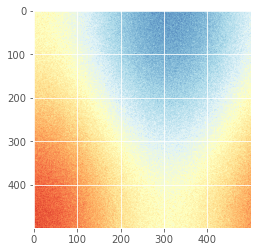

In [25]:
# add noise
np.random.seed(42)
z = _field + np.random.normal(0, 0.15, (500,  500))
plt.imshow(z, cmap='RdYlBu_r')

In [29]:
from skgstat import Variogram

In [32]:
coords.shape

(300, 2)

C:\Users\akif\.conda\envs\geo\lib\site-packages\skgstat\plotting\variogram_plot.py:96: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


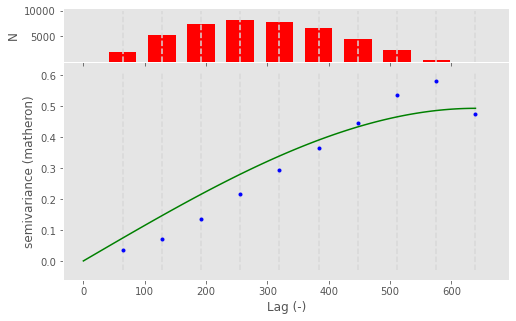

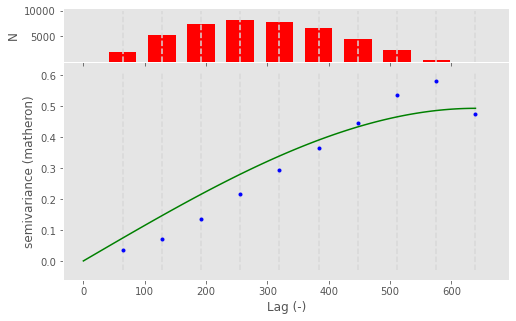

In [33]:
np.random.seed(42)
coords = np.random.randint(0, 500, (300, 2))
values = np.fromiter((z[c[0], c[1]] for c in coords), dtype=float)
V = Variogram(coords, values)
V.plot()

C:\Users\akif\.conda\envs\geo\lib\site-packages\skgstat\plotting\variogram_dd_plot.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


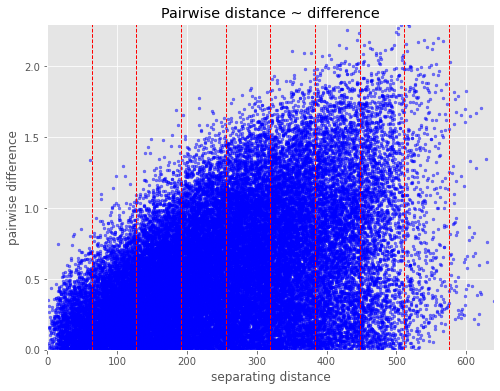

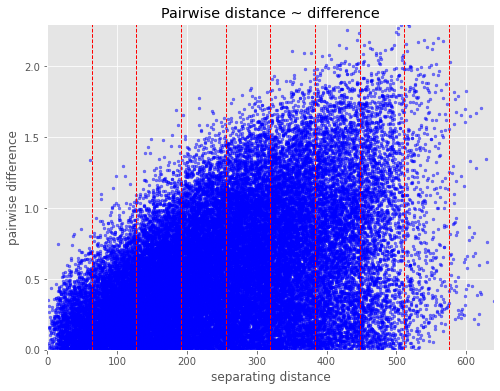

In [34]:
V.distance_difference_plot()


In [35]:
from skgstat.binning import even_width_lags, uniform_count_lags

from scipy.spatial.distance import pdist

loc = np.random.normal(50, 10, size=(30, 2))

distances = pdist(loc)

In [44]:
even_width_lags(distances, 10, 250)


(array([ 4.40456304,  8.80912608, 13.21368912, 17.61825216, 22.0228152 ,
        26.42737824, 30.83194128, 35.23650432, 39.64106736, 44.0456304 ]),
 None)

In [39]:
uniform_count_lags(distances, 10, 250)


(array([ 7.197713  , 10.43150148, 12.3403992 , 15.14677783, 17.69255592,
        20.38108778, 23.01263935, 26.27844348, 30.64086141, 44.0456304 ]),
 None)

In [45]:
import openturns as ot
# Input points
coordinates_train = ot.Sample([[15.68,62.64],[15.73,62.12],[16.10,61.14]])
# Output points
precipitation_train = ot.Sample([[3.4],[2.5],[4.5]]) # At 2000/1/2

In [52]:
import numpy as np

In [53]:
bb=np.array([[15.68,62.64],[15.73,62.12],[16.10,61.14]])

In [58]:
bb.shape

(3, 2)

In [59]:
# Fit
inputDimension = 2
basis = ot.ConstantBasisFactory(inputDimension).build()
covarianceModel = ot.SquaredExponential([1.]*inputDimension, [1.0])
algo = ot.KrigingAlgorithm(bb, precipitation_train, covarianceModel, basis)
algo.run()
result = algo.getResult()
krigingMetamodel = result.getMetaModel()

In [60]:
# Predict
coordinates = [15.70,62.53] # A new latitude/longitude pair

In [61]:
print(precipitation)

[3.46667]


In [79]:
import geopandas as gpd
import pandas as pd

In [82]:
stations_df=pd.read_csv('../../../Downloads/pointList.csv')
stations_df.head(1)

,PointId,Lat,Long
0,209,38.884,35.713


In [85]:
stations=gpd.GeoDataFrame(
    stations_df, geometry=gpd.points_from_xy(stations_df.Long, stations_df.Lat))

In [86]:
stations.head()

,PointId,Lat,Long,geometry
0,209,38.884,35.713,POINT (35.71300 38.88400)
1,210,38.047,39.348,POINT (39.34800 38.04700)
2,213,40.015,29.872,POINT (29.87200 40.01500)
3,214,39.395,33.644,POINT (33.64400 39.39500)
4,215,38.634,37.335,POINT (37.33500 38.63400)


In [75]:
adana=gpd.read_file('../../sample_data/tr_boundry/AF_ADANA_2020_v10.gpkg')
cols = [4,5,6,7,8,9,10]
adana.drop(adana.columns[cols],axis=1,inplace=True)
adana.reset_index(inplace=True,drop=False)


C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [76]:
adana.head()

,index,Il_Adi,Ilce_Adi,PlaceName,area,geometry
0,0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,"POLYGON ((35.44724 36.86743, 35.44610 36.86737..."
1,1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,"POLYGON ((35.44606 36.86887, 35.44598 36.86886..."
2,2,ADANA,YÜREĞİR,Agzibuyuk,1.527408,"POLYGON ((35.44644 36.86474, 35.44685 36.86509..."
3,3,ADANA,YÜREĞİR,Agzibuyuk,2.117166,"POLYGON ((35.44599 36.86972, 35.44596 36.86972..."
4,4,ADANA,YÜREĞİR,Agzibuyuk,1.218371,"POLYGON ((35.44698 36.87101, 35.44693 36.87105..."


In [77]:
dd=adana[0:100]

In [78]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [114]:
def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row[geom1_col], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    value = df2[nearest][src_column].values[0]
    return value

In [88]:
unary_union = stations.unary_union

In [144]:
nearest = stations['geometry'] == nearest_points(dd.iloc[0].geometry, unary_union)[1]
nearest

0       False
1       False
2       False
3       False
4       False
        ...  
4148    False
4149    False
4150    False
4151    False
4152    False
Name: geometry, Length: 4153, dtype: bool

In [145]:
stations[nearest]['PointId'].values[0]

7840

In [92]:
dd['centroid'] = dd.centroid

C:\Users\akif\.conda\envs\geo\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [196]:
dd_union=dd.centroid.unary_union

C:\Users\akif\.conda\envs\geo\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [197]:
stations.head(1)

,PointId,Lat,Long,geometry
0,209,38.884,35.713,POINT (35.71300 38.88400)


In [198]:
def nearest2(row, geom_union, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row, geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    value = df2[nearest][src_column].values[0]
    return value
#dd['aaa'] = dd.centroid.apply(lambda row:nearest2(row,geom_union=unary_union, df2=stations, geom1_col='centroid', src_column='PointId'))

In [192]:
stations['nearest_id'] = stations.geometry.apply(lambda row :nearest2(row,geom_union=dd_union, df2=dd, src_column='PointId'))

,index,Il_Adi,Ilce_Adi,PlaceName,area,geometry,centroid,nearest_id,aaa
0,0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,"POLYGON ((35.44724 36.86743, 35.44610 36.86737...",POINT (35.44674 36.86671),7840,7840
1,1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,"POLYGON ((35.44606 36.86887, 35.44598 36.86886...",POINT (35.44684 36.86817),7840,7840
2,2,ADANA,YÜREĞİR,Agzibuyuk,1.527408,"POLYGON ((35.44644 36.86474, 35.44685 36.86509...",POINT (35.44647 36.86537),7840,7840
3,3,ADANA,YÜREĞİR,Agzibuyuk,2.117166,"POLYGON ((35.44599 36.86972, 35.44596 36.86972...",POINT (35.44707 36.86942),7840,7840
4,4,ADANA,YÜREĞİR,Agzibuyuk,1.218371,"POLYGON ((35.44698 36.87101, 35.44693 36.87105...",POINT (35.44645 36.87038),7840,7840


In [152]:
 stations[stations['geometry']==nearest_points(dd.iloc[0]['geometry'], unary_union)[1]]

,PointId,Lat,Long,geometry
3308,7840,36.8977,35.457,POINT (35.45700 36.89770)


In [158]:
dd.head()

,index,Il_Adi,Ilce_Adi,PlaceName,area,geometry,centroid,nearest_id
0,0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,"POLYGON ((35.44724 36.86743, 35.44610 36.86737...",POINT (35.44674 36.86671),7840
1,1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,"POLYGON ((35.44606 36.86887, 35.44598 36.86886...",POINT (35.44684 36.86817),7840
2,2,ADANA,YÜREĞİR,Agzibuyuk,1.527408,"POLYGON ((35.44644 36.86474, 35.44685 36.86509...",POINT (35.44647 36.86537),7840
3,3,ADANA,YÜREĞİR,Agzibuyuk,2.117166,"POLYGON ((35.44599 36.86972, 35.44596 36.86972...",POINT (35.44707 36.86942),7840
4,4,ADANA,YÜREĞİR,Agzibuyuk,1.218371,"POLYGON ((35.44698 36.87101, 35.44693 36.87105...",POINT (35.44645 36.87038),7840


In [117]:
weather_stat=pd.read_csv('../../../Downloads/weather365/7840.csv')
weather_stat['new_date']= weather_stat['new_date'].astype('datetime64')

In [127]:
weather_stat.head()

,new_date,Unnamed: 0,Id,PointId,MaxTemperature,MinTemperature,Precipitation,RelativeHumidity,WindSpeed
0,2020-01-01,388.0,18061634.0,7840.0,13.5,5.0,450.0,73.0,12.0
1,2020-01-02,568.0,19632399.0,7840.0,15.0,5.0,0.0,75.0,11.0
2,2020-01-03,389.5,18074697.5,7840.0,12.5,8.5,3450.0,82.5,12.0
3,2020-01-04,390.5,18083406.0,7840.0,13.5,8.5,1950.0,88.0,7.0
4,2020-01-05,391.5,18092114.5,7840.0,14.0,6.5,1750.0,83.0,6.5


In [128]:
weather_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   new_date          366 non-null    datetime64[ns]
 1   Unnamed: 0        366 non-null    float64       
 2   Id                366 non-null    float64       
 3   PointId           366 non-null    float64       
 4   MaxTemperature    366 non-null    float64       
 5   MinTemperature    366 non-null    float64       
 6   Precipitation     366 non-null    float64       
 7   RelativeHumidity  366 non-null    float64       
 8   WindSpeed         366 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 25.9 KB


In [141]:
round(weather_stat[(weather_stat['new_date'] > '2020-01-01') & (weather_stat['new_date'] < '2020-02-01')]['MaxTemperature'].mean(),4)

14.6667